In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2

In [22]:
def dataframe():
    df = pd.read_csv(PATH_DF_CSV)
    df.rename(columns = {'image':'id_code', 'level':'diagnosis'}, inplace = True)
    return df

def create_path():
    df = dataframe()
    x = df['id_code']
    y = df['diagnosis']
    paths = []
    for i in x:
        path = PATH_OF_IMAGE+f'{i}.jpeg'
        paths.append(path)
    return paths

def load_data(subset=None):
    paths = create_path()
    imgs = []
    for path in paths[:subset]:
        img = cv2.imread(path)
        imgs.append(np.array(img))
    X = np.array(imgs)
    return X

def preprocessing_1_autocropping(sigmaX=10):
    """
    Create circular crop around image centre and applies Ben Graham's color
    """

    X = load_data(subset =10)

    images = []

    for image in X:
        img = first_cropping(image)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

        height, width, depth = img.shape

        x = int(width/2)
        y = int(height/2)
        r = np.amin((x,y))

        circle_img = np.zeros((height, width), np.uint8)
        cv2.circle(circle_img, (x,y), int(r), 1, thickness=-1)
        img = cv2.bitwise_and(img, img, mask=circle_img)
        img = first_cropping(img)
        img=cv2.addWeighted ( img,4, cv2.GaussianBlur( img , (0,0) , sigmaX) ,-4 ,128)

        images.append(np.array(img))

    preprocessed_X_autocropping = np.array(images)
    return preprocessed_X_autocropping

def first_cropping(img,tol=7):
    '''
    tol is tolerance, img is image data, creates first cropping
    '''

    if img.ndim ==2:
        mask = img>tol
        return img[np.ix_(mask.any(1),mask.any(0))]
    elif img.ndim==3:
        gray_img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
        mask = gray_img>tol

        check_shape = img[:,:,0][np.ix_(mask.any(1),mask.any(0))].shape[0]
        if (check_shape == 0): # image is too dark so that we crop out everything,
            return img # return original image
        else:
            img1=img[:,:,0][np.ix_(mask.any(1),mask.any(0))]
            img2=img[:,:,1][np.ix_(mask.any(1),mask.any(0))]
            img3=img[:,:,2][np.ix_(mask.any(1),mask.any(0))]

            img = np.stack([img1,img2,img3],axis=-1)

        return img

def preprocessing_2_same_size():
    X = load_data(subset = 10)
    images = []
    for image in X:
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        image = first_cropping(image)
        image = cv2.resize(image, (512, 512))
        image=cv2.addWeighted(image,4, cv2.GaussianBlur(image , (0,0) , 10) ,-4 ,128)
        images.append(np.array(image))

    preprocessed_X_same_size = np.array(images)

    return preprocessed_X_same_size

In [3]:
PATH_DF_CSV = '/Users/jade/code/lucieluneau/blindness_detection/raw_data/Diabetic Retinopathy - 1/datasets_train.csv'
PATH_OF_IMAGE = '/Users/jade/code/lucieluneau/blindness_detection/raw_data/Diabetic Retinopathy - 1/resized_train_cropped/'

In [4]:
df = dataframe()

In [9]:
paths = create_path()

In [15]:
X = load_data(subset= 1)

In [23]:
preprocessed_autocropping = preprocessing_1_autocropping()

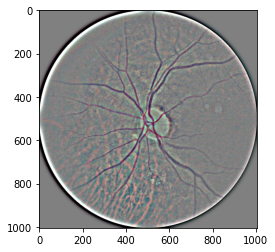

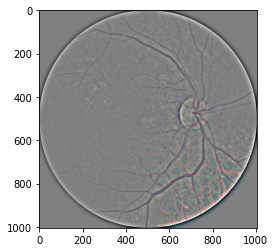

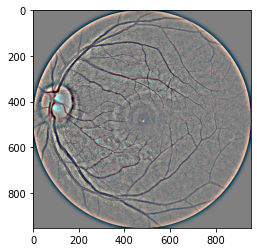

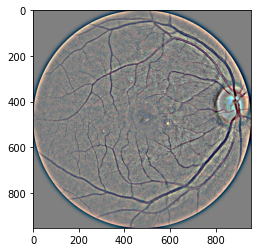

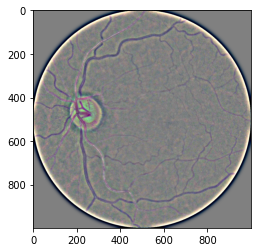

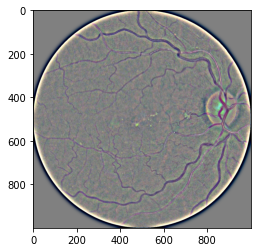

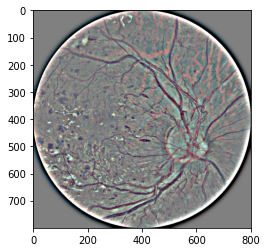

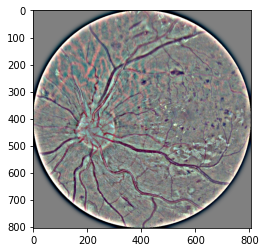

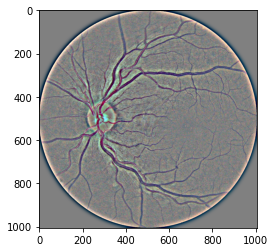

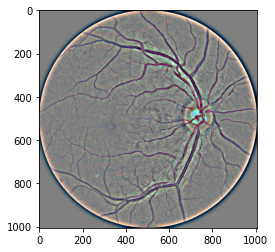

In [24]:
for image in preprocessed_autocropping: 
    plt.imshow(image)
    plt.show()

In [25]:
preprocessed_samesize = preprocessing_2_same_size()

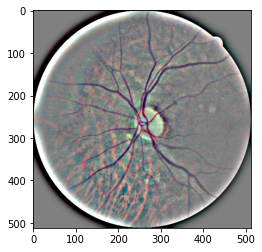

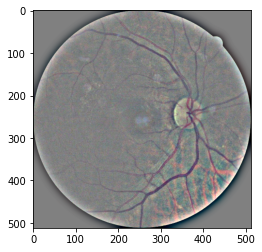

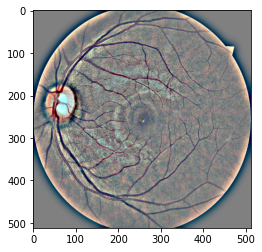

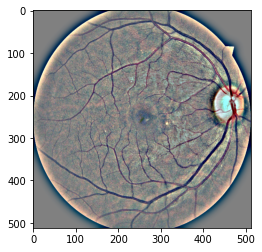

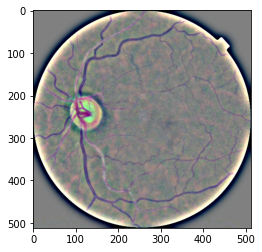

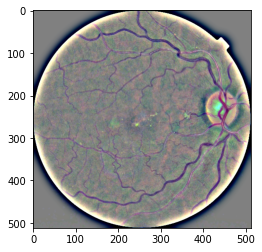

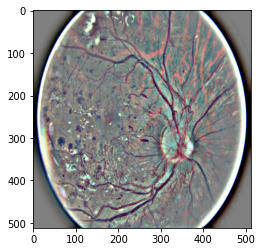

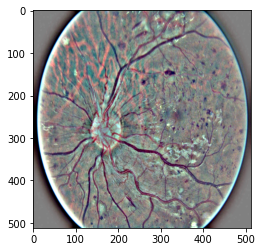

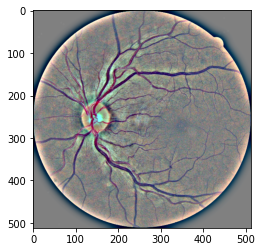

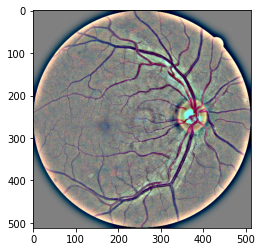

In [26]:
for image in preprocessed_samesize: 
    plt.imshow(image)
    plt.show()